In [1]:
import os
import sys
sys.path.append('../')
from lib.env.global_var import *
from lib.func.shelve_store import *
sys.path.remove('../')
import statsmodels

In [2]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%run -i financial_sector.py

# Fred econ data

In [4]:
for csv_file in csv_name_list:
    var_name = csv_file.split(".")[0]
    exec(var_name+" = read_csv( '"+econ_dir_str+csv_file+"' )")

In [5]:
GDP_ret = GDP.shift()/GDP-1
GDP_ret = quaterly_to_monthly(GDP_ret.dropna())
GDP_ret.columns=[map(str,GDP.columns)[0]+"_ret"]

In [6]:
PCE = PCE.resample("M").last()
PCE_ret = (PCE.shift()/PCE -1).dropna()
PCE_ret.columns = [map(str,PCE.columns)[0]+"_ret"]

# Bloomberg econ data

In [7]:
for excel_file in bldata_name_list:
    var_name = excel_file.split(".")[0]
    exec(var_name+" = read_data( '" + bldata_dir_str+excel_file+"' )")

In [8]:
blb_list = map(lambda x:x.split(".")[0],bldata_name_list)

In [9]:
OIL=OIL.resample("M").last()

In [10]:
fred_list = map(lambda x: x.split(".")[0],csv_name_list)

In [11]:
ret_list = ['GDP','PCE']
for ret in ret_list:
    fred_list[fred_list.index(ret)] =ret+"_ret"

In [12]:
x_list = fred_list+blb_list

In [13]:
var_list_str =""
for var in x_list:
    var_list_str += ','+var
var_list_str = var_list_str[1:]

In [14]:
for var in x_list:
    exec(var+" = quaterly_to_monthly("+var+")")

In [15]:
exec("x = pd.concat("+"["+var_list_str+"]"+",1)")

In [16]:
x = x.resample("M").last().dropna()

In [17]:
x.head()

,CPALTT01USQ657N,GDP_ret,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE_ret,UNRATE,UMCSENT,BAMLH0A0HYM2,RECPROUSM156N,VIXCLS,XOI Index,YIELD_SLOPE,XAU Curncy
1999-01-31,0.4,-0.012856,4.66,92.75,127727.0,0.60,4.63,-208.515,-0.000148,4.3,103.9,5.60,0.00,26.25,394.97,0.081,286.15
1999-02-28,0.4,-0.012856,5.29,93.01,128136.0,0.48,4.76,-208.515,-0.004749,4.4,108.1,5.21,0.00,27.88,384.96,0.149,287.05
1999-03-31,0.4,-0.012856,5.25,93.64,128244.0,0.63,4.81,-208.515,-0.005114,4.2,105.7,5.19,0.04,23.26,450.59,0.255,280.05
1999-04-30,1.0,-0.011500,5.36,94.47,128618.0,0.56,4.74,-245.428,-0.010267,4.3,104.6,4.76,0.02,25.07,515.08,0.294,286.55
1999-05-31,1.0,-0.011500,5.64,95.40,128830.0,0.54,4.74,-245.428,-0.004765,4.2,106.8,4.75,0.00,25.39,505.39,0.209,270.35


# prepare y

In [18]:
sector_ind = read_data(benchmark_str,8)
sector_ind_ret = (sector_ind.shift()/sector_ind - 1).dropna()
# sector_ind_ret.head()

In [19]:
spx_ind = read_csv(spx_str)
spx_ind_ret = (spx_ind.shift()/spx_ind - 1).dropna()
# spx_ind_ret.head()

In [20]:
sector_ind_ret,spx_ind_ret = model_data(sector_ind_ret,spx_ind_ret)

In [68]:
sector_beat_spx = pd.DataFrame((sector_ind_ret.values>spx_ind_ret.values),index = sector_ind_ret.index)*1
sector_beat_spx.columns = ['sector_beat_spx']
sector_beat_spx.head(2)

,sector_beat_spx
2000-06-30,0
2000-07-31,1


In [69]:
x,sector_beat_spx = model_data(x,sector_beat_spx)

# x=pd.DataFrame(preprocessing.scale(x),index = x.index,columns =x.columns)
y=sector_beat_spx

In [70]:
x.columns

Index([u'CPALTT01USQ657N',         u'GDP_ret',           u'DGS10',
            u'CSUSHPINSA',          u'PAYEMS',         u'TEDRATE',
              u'FEDFUNDS',          u'NETEXP',         u'PCE_ret',
                u'UNRATE',         u'UMCSENT',    u'BAMLH0A0HYM2',
         u'RECPROUSM156N',          u'VIXCLS',       u'XOI Index',
           u'YIELD_SLOPE',      u'XAU Curncy'],
      dtype='object')

In [71]:
# for col_name in x.columns:
#     if "_ret" not in col_name:
#         x.loc[:,col_name] = pd.DataFrame(preprocessing.scale(x.loc[:,col_name]),index = x.index, columns = [col_name])

In [72]:
x.head()

,CPALTT01USQ657N,GDP_ret,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE_ret,UNRATE,UMCSENT,BAMLH0A0HYM2,RECPROUSM156N,VIXCLS,XOI Index,YIELD_SLOPE,XAU Curncy
2000-06-30,1.1,-0.024061,6.03,104.86,132077.0,1.06,6.53,-359.587,-0.005374,4.0,106.4,6.17,0.34,19.54,505.35,-0.331,289.53
2000-07-31,0.8,-0.007638,6.04,105.72,132253.0,0.69,6.54,-388.487,-0.002959,4.0,108.3,6.26,0.48,20.74,480.59,-0.257,277.25
2000-08-31,0.8,-0.007638,5.73,106.52,132240.0,0.55,6.50,-388.487,-0.005125,4.1,107.3,6.43,0.70,16.84,520.25,-0.438,277.85
2000-09-30,0.8,-0.007638,5.80,107.14,132375.0,0.76,6.52,-388.487,-0.012209,3.9,106.8,6.77,1.00,20.57,526.68,-0.177,274.25
2000-10-31,0.5,-0.010966,5.77,107.73,132361.0,0.57,6.51,-402.351,-0.000939,3.9,105.8,7.79,2.68,23.63,518.87,-0.163,265.15


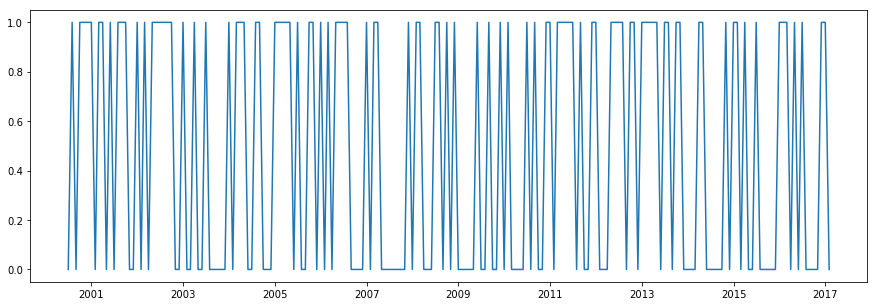

In [73]:
plt.figure(figsize = (15,5))
plt.plot(y)
plt.show()

# New method 
rolling years

In [63]:
# data_years = np.sort(list(set(x.index.year)))

# sample_years = 5

# for index in range(len(data_years)-sample_years):
#     print(data_years[index:index+sample_years],data_years[index+sample_years])

In [64]:
# temp = data_years[index:index+sample_years]

In [65]:
# data = pd.DataFrame()
# for year in temp:
#     data = pd.concat([data,x[str(year)]])

## data selection
Used l1 penalty to suqash out not usefull data  
decided to use the following econ data

In [74]:
n = 3
penalty ='l1'
C = 1/(0.10)
evaluation_metric = 'r2'

In [75]:
metric_list,coef_df = KF_logistic_eval(x,y,n = 3,penalty ='l1',C = 1/(10.0),evaluation_metric = 'r2')

In [76]:
np.round(np.mean(metric_list),2),np.round(metric_list,3)

(-0.92000000000000004, array([-1.233, -1.025, -0.517]))

In [77]:
coef_df

,CPALTT01USQ657N,GDP_ret,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE_ret,UNRATE,UMCSENT,BAMLH0A0HYM2,RECPROUSM156N,VIXCLS,XOI Index,YIELD_SLOPE,XAU Curncy
0,0.0,0.0,0.0,0.000000,-0.000044,0.0,0.0,-0.004523,0.0,0.0,0.021059,0.0,0.003698,0.000000,-0.000774,0.0,0.002147
1,0.0,0.0,0.0,-0.013927,-0.000036,0.0,0.0,-0.003577,0.0,0.0,0.038050,0.0,0.021148,0.044040,0.000537,0.0,0.000512
2,0.0,0.0,0.0,-0.037852,-0.000016,0.0,0.0,-0.006187,0.0,0.0,0.036908,0.0,0.000000,0.024153,0.000067,0.0,0.000878
